In [27]:
from sena.data.norec.dataloader import load_full_dataset
import pandas as pd

In [28]:
data = load_full_dataset()

train = data['train']
val = data['dev']
test = data['test']

combined_data = pd.concat([train, val, test])

print(f"Train: {train.shape}")
print(f"Val: {val.shape}")
print(f"Test: {test.shape}")
print(f"Combined: {combined_data.shape}")

Train: (34903, 3)
Val: (4360, 3)
Test: (4351, 3)
Combined: (43614, 3)


In [29]:
combined_data

,id,text,label
0,000000,Rome S02\nToppen innen tv-drama akkurat nå! \n...,2
1,000001,Twin Peaks - definitive gold box edition\nGull...,2
2,000002,The Wire (sesong 1-4)\nThe Wire vil gjøre deg ...,2
3,000003,"Mad Men (sesong 1)\nStilig, underholdende og s...",2
4,000004,Mad Men (sesong 2)\nTV-underholdning av høyest...,2
...,...,...,...
4346,706991,Politisk protestpønk fra gamle helter\nGamle h...,2
4347,706992,79-åringen står fortsatt på barrikadene\nBen H...,2
4348,706993,Utseendet teller ikke - eller?\n«Ansiktet» utf...,1
4349,706994,Hektisk homsesex med tårefylte forviklingar\nB...,1


<AxesSubplot:>

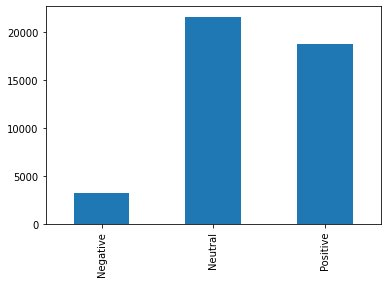

In [30]:
combined_data["label"].replace({0: "Negative", 1: "Neutral", 2: "Positive"}).value_counts().sort_index().plot.bar()

<AxesSubplot:ylabel='Frequency'>

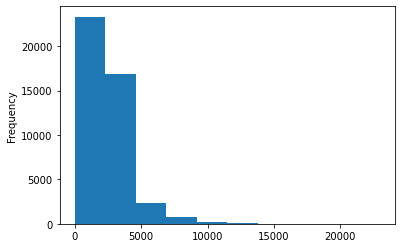

In [31]:
combined_data["text"].str.len().plot.hist()

In [51]:
aggregated_data = combined_data.groupby("label")["text"].apply(" ".join).reset_index()

positive_texts = aggregated_data[aggregated_data["label"] == 2]["text"].values[0]
neutral_texts = aggregated_data[aggregated_data["label"] == 1]["text"].values[0]
negative_texts = aggregated_data[aggregated_data["label"] == 0]["text"].values[0]

In [52]:
from sena.utils.utils import load_stopwords
from collections import Counter
from tqdm import tqdm

stopwords = load_stopwords()

combined_text = (positive_texts + neutral_texts + negative_texts).split(" ")
word_counter = Counter()
for word in tqdm(combined_text, desc="Counting words"):
    if word not in stopwords and word.isalpha():
        word_counter[word] += 1

Counting words: 100%|██████████| 17620539/17620539 [01:28<00:00, 198884.93it/s]


In [53]:
word_counter.most_common(10)

[('får', 33954),
 ('litt', 32275),
 ('to', 27163),
 ('gjør', 26574),
 ('helt', 25044),
 ('kommer', 22050),
 ('godt', 21686),
 ('nok', 19596),
 ('første', 18545),
 ('år', 18388)]

In [54]:
from wordcloud import WordCloud

positive_wordcloud = WordCloud(stopwords=stopwords).generate(positive_texts)
negative_wordcloud = WordCloud(stopwords=stopwords).generate(negative_texts)
neutral_wordcloud = WordCloud(stopwords=stopwords).generate(neutral_texts)

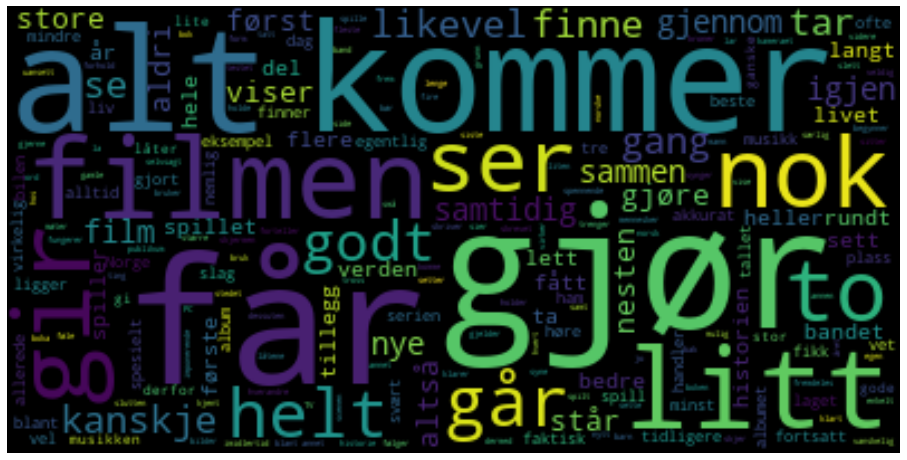

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 9))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

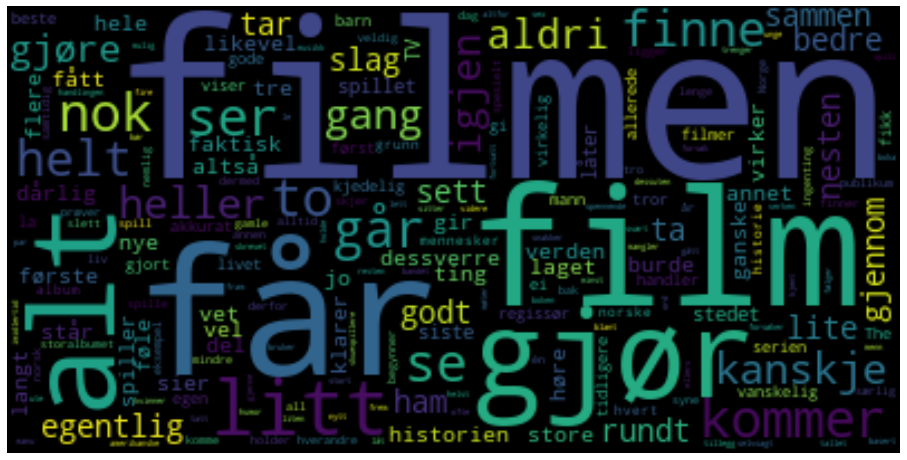

In [56]:
plt.figure(figsize=(16, 9))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

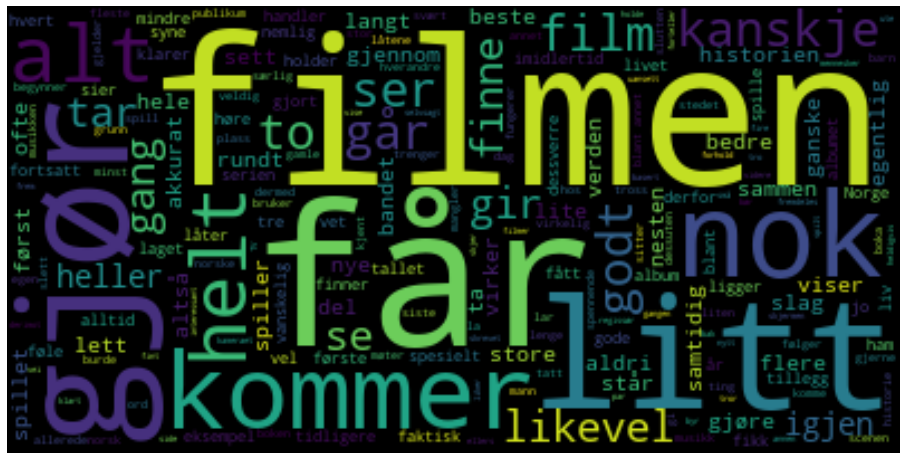

In [57]:
plt.figure(figsize=(16, 9))
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()